In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc, roc_auc_score

In [2]:
df = pd.read_csv('D:\SEM 4\Supervised Machine Learning Lab\\heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.shape

(1025, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0.5, 1.0, 'Age-Cholestrol Scatter plot')

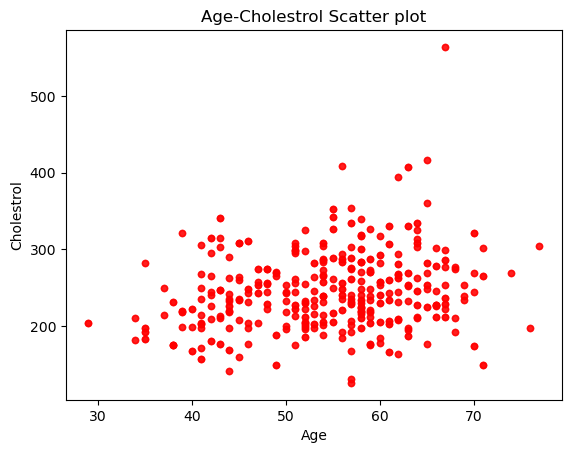

In [12]:
df.plot(kind='scatter',x='age',y='chol',alpha=0.5,color='red')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.title("Age-Cholestrol Scatter plot")

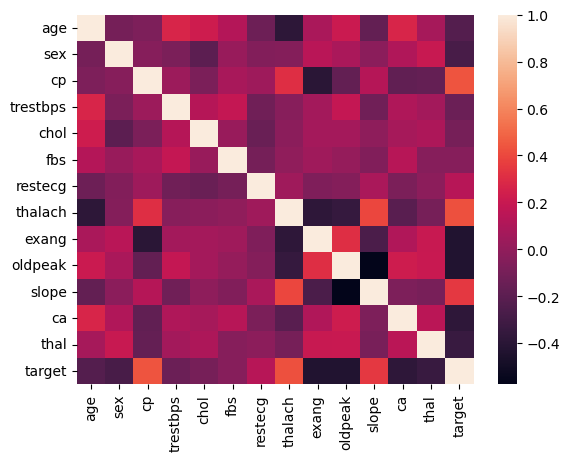

In [18]:
corr = df.corr()
sns.heatmap(corr)
plt.show()

In [14]:
X= df.drop('target',axis=1)
y = df.target

In [15]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=100)

In [21]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
310,61,1,0,120,260,0,1,140,1,3.6,1,1,3
492,64,1,2,125,309,0,1,131,1,1.8,1,0,3
222,64,1,3,110,211,0,0,144,1,1.8,1,0,2
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2
28,56,1,2,130,256,1,0,142,1,0.6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,52,1,1,134,201,0,1,158,0,0.8,2,1,2
855,46,1,1,101,197,1,1,156,0,0.0,2,0,3
871,39,1,2,140,321,0,0,182,0,0.0,2,0,2
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2


In [22]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
960,52,0,2,136,196,0,0,169,0,0.1,1,0,2
48,66,0,2,146,278,0,0,152,0,0.0,1,1,2
886,61,1,0,120,260,0,1,140,1,3.6,1,1,3
981,39,1,0,118,219,0,1,140,0,1.2,1,0,3
973,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,40,1,3,140,199,0,1,178,1,1.4,2,0,3
859,51,1,0,140,299,0,1,173,1,1.6,2,0,3
727,56,1,1,130,221,0,0,163,0,0.0,2,0,3
685,63,0,0,150,407,0,0,154,0,4.0,1,3,3


In [23]:
y_train

310    0
492    0
222    1
110    0
28     0
      ..
79     1
855    1
871    1
835    0
792    0
Name: target, Length: 820, dtype: int64

In [24]:
y_test

960    1
48     1
886    0
981    0
973    1
      ..
156    1
859    0
727    1
685    0
436    0
Name: target, Length: 205, dtype: int64

- There are three types of hyperparameters in SVM:
    - Kernal: rbf
    - C parameter
    - Gamma Parameter

In [29]:
ml = svm.SVC()
param_grid= {'C':[1,10,1000,10000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

In [30]:
grid = GridSearchCV(ml,param_grid,refit = True, verbose=1,cv=15)
grid_search=grid.fit(X_train,y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits


In [31]:
grid_search.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [33]:
accuracy= grid_search.best_score_ *100
print("Accuracy for our training dataset without tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset without tuning is : 98.90%


In [38]:
y_pred = grid.predict(X_test)

In [41]:
test_accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy for our model with tuning is : {:.2f}%".format(test_accuracy))

Accuracy for our model with tuning is : 98.05%


In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 93   4]
 [  0 108]]


In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

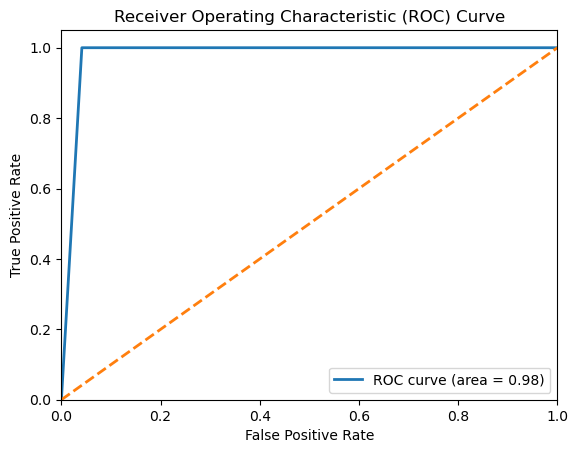

In [48]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
auc_roc_accuracy = (roc_auc_score(y_test, y_pred))*100
print("AUC-ROC Accuracy:", auc_roc_accuracy)

AUC-ROC Accuracy: 97.93814432989691
